# Quelques méthodes bas-niveau


## Introduction


Maintenant que nous commençons à maîtriser les éléments fondamentaux de Qiskit que sont les registres quantiques, les qubits, leurs équivalents classiques et quelques portes quantiques élémentaires, nous pouvons rentrer dans le vif du sujet. 

Dans le cadre de cette séance :

- nous reverrons la mesure pour pouvoir utiliser les résultats obtenus ;
- nous développerons des petits algorithmes quantiques.

A la fin du cours, vous devrez téléverser sur le Moodle votre notebook que vous aurez pris le soin de renommer sous la forme *27-10-2020 Nom Prénom*.


### Nom et prénom


Commençons par inscrire votre nom et prénom en tant qu'objet string nom_prenom. Nous utiliserons comme convention :

- Un _ séparera le nom et le prénom.

Ainsi :

- Pour Jean Philippe Arias Zapata (le tiret est une longue histoire...), nom_prenom = 'Arias Zapata_Jean Philippe ; 
- Pour Jean-Pierre Pernault, nom_prenom = 'Pernault_Jean-Pierre'.

In [ ]:
nom_prenom = 

## La mesure, le retour


Lors de la dernière séance, nous avions appris à construire un circuit quantique, à y ajouter des portes quantiques et à appliquer la mesure. Ce n'est évidemment pas suffisant puisque les lignes de code vous ont été données et que nous n'avons pas "joué" avec les résultats des mesures. 

Dans cette partie, nous allons :

- disséquer les lignes de codes qui vous ont été fournies ;
- récolter des informations à partir des résultats des mesures.

Nous exercerons nos capacités apprises durant la dernière séance en modifiant petit à petit le circuit quantique permettant d'obtenir l'un des états de Bell.

### Dissection des lignes de code de la mesure

**1) Construisez le circuit quantique suivant** *circ_bell* **qui permet d'obtenir l'un des états de Bell :**

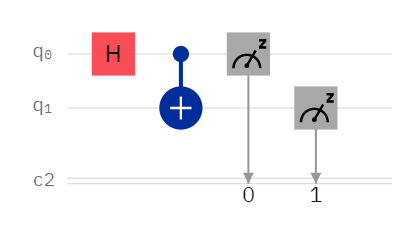

Pour cela, vous n'aurez pas encore besoin de Qiskit Aer.

In [ ]:
from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit

circ_bell = 

In [ ]:
circ_bell.draw(output='mpl')

Le circuit quantique construit *circ_bell* n'est pour le moment qu'une instruction qu'il faut exécuter sur un émulateur ou un véritable ordinateur quantique, génériquement appelé *backend*. Ici, nous utiliserons un émulateur directement proposé par Qiskit nommé *qasm simulator*.

In [ ]:
from qiskit import Aer

simulator = Aer.get_backend('qasm_simulator')

Après avoir choisi le backend, nous pouvons maintenant exécuter le circuit quantique sur celui-ci :

In [ ]:
from qiskit import execute

job_bell = execute(circ_bell, simulator, shots=1000)

Maintenant que le circuit quantique est exécuté, nous voulons en récupérer des informations. C'est exactement le rôle de la méthode *result()* :

In [ ]:
result_bell = job_bell.result()

L'objet créé *result_bell* est de type *Result* et contient toutes les informations sur la tâche, par exemple :

- le statut de l'exécution du circuit quantique (attribut *status*) ;
- la date d'exécution (attribut *date*) ;
- le temps d'exécution (attribut *time_taken*) ;
- le backend utilisé (attribut *backend_name*) ;
- l'identifiant attribuée à la tâche (attribut *job_id*).

Je vous conseille de fouiller (une prochaine fois) pour trouver d'autres attributs intéressants des objets de type *Result*. C'est finalement la méthode *get_counts()* qui nous intéresse le plus aujourd'hui puisqu'elle nous permet d'obtenir les résultats de la mesure sous la forme d'un dictionnaire :

In [ ]:
mesures_bell = result_bell.get_counts()

In [ ]:
print(mesures_bell)

### Récolte des résultats de mesure

Nous avons finalement les résultats des mesures. Nous pouvons maintenant en tirer des informations.

**1) Quel est le pourcentage** *p_bell* **de sorties tel que le second qubit** *q_bell[1]* **soit à la valeur 0 après mesure ?**

In [ ]:
p_bell = 

In [ ]:
from math import isclose
assert isclose(p_bell, 0.5, rel_tol=0.1)

**2) Pour le circuit quantique suivant, quel est le pourcentage** *p_v* **de sorties tel que le second qubit** *q_v[1]* **soit à la valeur 0 après mesure ?**

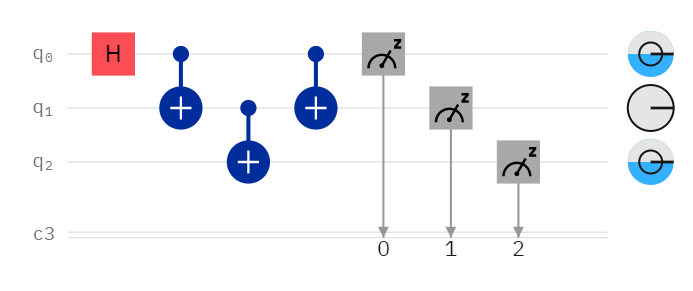

In [ ]:
p_v = 

In [ ]:
assert isclose(p_v, 1, rel_tol=0.1)

**3) Pour le circuit quantique suivant, quel est le pourcentage** *p_l* **de sorties tel que le premier qubit** *q_l[0]* **soit à la valeur 0 et le troisième qubit** *q_l[2]* **à la valeur 1 après mesure ?**

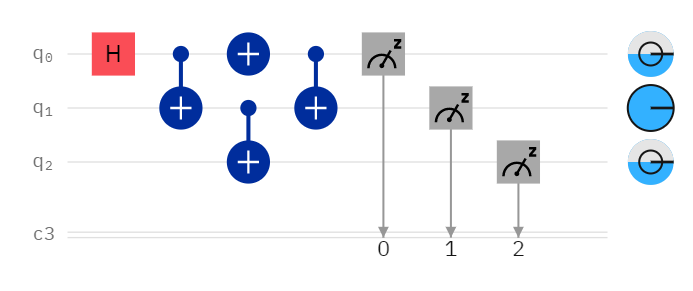

In [ ]:
p_l = 

In [ ]:
assert isclose(p_l, 0.5, rel_tol=0.1)

### Bonus (attention, le notebook continue après le bonus !)

Une méthode alternative pour trouver *p_bell* (le pourcentage de mesures tel que le second qubit a pour valeur 0) aurait été de ne mesurer que le qubit $q_1$ du circuit quantique *circ_bell* de la manière suivante :

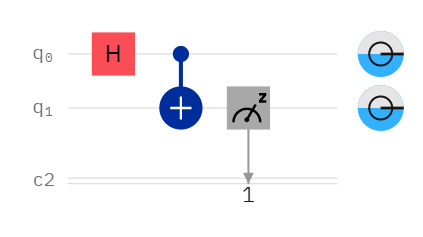

**1) Vérifiez que le pourcentage** *p_alt* **trouvé par la méthode alternative est bien similaire à** *p_bell* **. Faites attention aux conventions de Qiskit !**

In [ ]:
p_alt = 

In [ ]:
assert isclose(p_alt, p_bell, rel_tol=0.1)

## Méthodes et portes quantiques

Dans cette partie, nous apprendrons à implémenter et à écrire une méthode pour :

- la porte SWAP ;
- la transformée de Fourier quantique.

### Porte SWAP

La porte SWAP est une porte composée de trois CNOTs. Le circuit quantique associé est de la forme :

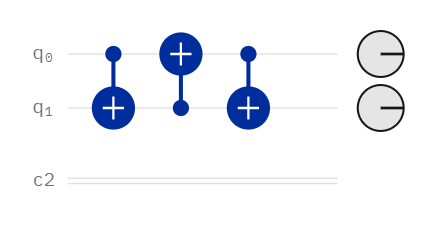

Commençons par le circuit quantique suivant *circ_swap* à deux qubits :

In [ ]:
q_swap = QuantumRegister(2)
circ_swap = QuantumCircuit(q_swap)

circ_swap.x(q_swap[0])

In [ ]:
circ_swap.draw(output='mpl')

**1) Implémentez une porte SWAP directement sur** *circ_swap* **:**

In [ ]:
circ_swap.draw(output='mpl')

**2) Définissez une méthode** *porte_SWAP* **permettant de faire une porte SWAP ayant en entrée :**

- un circuit quantique ;
- un registre quantique de dimension deux ;

**et donnant en sortie le circuit quantique donné en entrée avec la porte SWAP implémentée.**

In [ ]:
def porte_SWAP(circuit, qubits):
    
    

In [ ]:
circ_swap = porte_SWAP(circ_swap, q_swap)
circ_swap.draw(output='mpl')

**3) Définissez une méthode** *do_swaps* **utilisant la méthode** *porte_SWAP* **telle que :**

- l'état du premier qubit soit échangé avec celui du dernier qubit ;
- l'état du second qubit soit échangé avec celui de l'avant-dernier qubit ;
- etc. ;

**et telle que si le nombre de qubits est impair, l'état du qubit central soit inchangé.**

In [ ]:
def do_swaps(circuit, registre):
    

In [ ]:
q_test = QuantumRegister(3)
do_swaps(QuantumCircuit(q_test), q_test).draw(output='mpl')

In [ ]:
q_test = QuantumRegister(4)
do_swaps(QuantumCircuit(q_test), q_test).draw(output='mpl')

La méthode *do_swaps* peut être utilisé pour passer d'une convention LSBF à une convention MSBF et vice versa. Ceci peut être utile puisque, par exemple, une porte quantique A peut être dans une certaine convention et une porte quantique B dans une autre.


### Transformée de Fourier quantique


La transformée de Fourier quantique est une porte quantique utilisée pour de nombreux algorithmes quantiques tels que l'estimateur de phase ou d'amplitude. Celle-ci s'adapte à la taille de n'importe quel registre quantique sur lequel elle s'applique.

Son implémentation est par contre problématique pour une raison bien précise : si le registre quantique était dans la convention LSBF avant l'application de la transformée de Fourier quantique, il sera ensuite dans la convention MSBF, et vice versa (cf. les notes de cours d'Ashley Montanaro). Nous comprenons maintenant l'intérêt de la méthode *do_swaps* qui permet de résoudre ce problème.

Donnons un exemple de circuit quantique avec une porte agissant comme une transformée de Fourier quantique sur un registre quantique de dimension 2 :

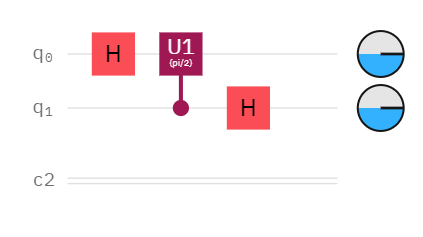

Nous aurons besoin de la porte quantique *cu1*. Commençons par implémenter le circuit quantique *circ_cu1* suivant :

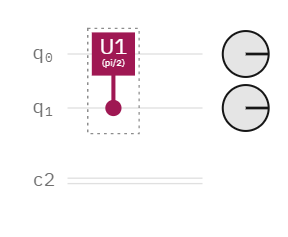

In [ ]:
from math import pi

circ_cu1 = QuantumCircuit(2)
q = circ_cu1.qubits

circ_cu1.cu1(pi/2, q[1], q[0])

In [ ]:
circ_cu1.draw(output='mpl')

L'ordre des paramètres de la méthode *cu1* est le suivant :

- l'angle ;
- le qubit de contrôle ;
- le qubit cible.

**1) Implémentez la transformée de Fourier quantique pour un registre quantique de dimension 2 dans un circuit quantique nommé** *circ2*.

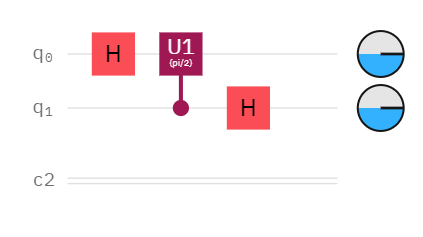

In [ ]:
circ2 = 

In [ ]:
circ2.draw(output='mpl')

**2) Définissez une méthode** *QFT2* **permettant d'appliquer une transformée de Fourier quantique sur un registre quantique de dimension 2 ayant en entrée :**

- un circuit quantique ; 
- le registre quantique de dimension 2 sur lequel appliqué la transformée de Fourier quantique.

In [ ]:
def QFT2(circuit, registre):
    
    return circuit
    

In [ ]:
q2 = QuantumRegister(2)
QFT2(QuantumCircuit(q2), q2).draw(output='mpl')

**2) Définissez une méthode** *QFT3* **permettant d'appliquer une transformée de Fourier quantique sur un registre quantique de dimension 3 ayant en entrée :**

- un circuit quantique ; 
- le registre quantique de dimension 3 sur lequel appliqué la transformée de Fourier quantique.

Le circuit quantique associé est :

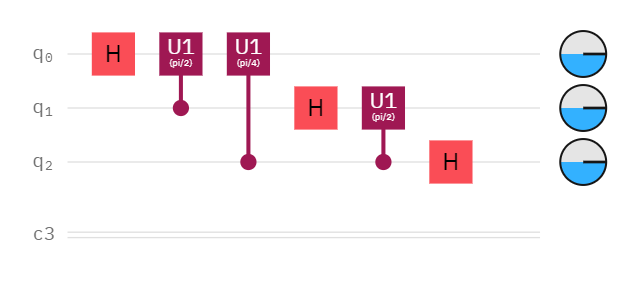

In [ ]:
def QFT3(circuit, registre):
    
    return circuit

In [ ]:
q3 = QuantumRegister(3)
QFT3(QuantumCircuit(q3), q3).draw(output='mpl')

**3) Faites de même pour une transformée de Fourier quantique appliquée à un registre quantique de dimension 4 :**

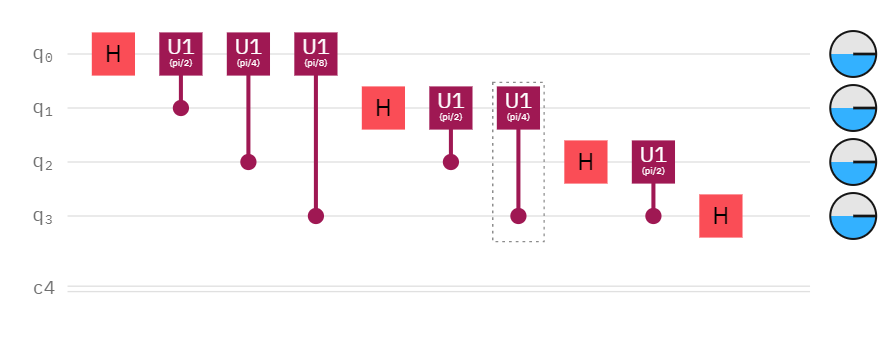

In [ ]:
def QFT4(circuit, registre):
    
    return circuit
    

In [ ]:
q4 = QuantumRegister(4)
QFT4(QuantumCircuit(q4), q4).draw(output='mpl')

### Bonus

Nous allons tenter maintenant de définir une méthode *QFT* capable d'appliquer une transformée de Fourier quantique quelque soit la taille du registre quantique. 

Pour comprendre la récurrence qui nous permettra de définir cette méthode *QFT*, nous aurons besoin de la méthode *R* suivante :

In [ ]:
def R(k, circuit, qubit_controle, qubit_cible):    
    circuit.cu1(pi/2**k, qubit_controle, qubit_cible)
    return circuit

**Réécrivez les méthodes** *QFT3* et *QFT4* **à l'aide de la méthode** *R* **:**

In [ ]:
def QFT3(circuit, registre):
   
    return circuit
    

In [ ]:
q3 = QuantumRegister(3)
QFT3(QuantumCircuit(q3), q3).draw(output='mpl')

In [ ]:
def QFT4(circuit, registre):
    
    return circuit
    

In [ ]:
q4 = QuantumRegister(4)
QFT4(QuantumCircuit(q4), q4).draw(output='mpl')

Voyez-vous la récurrence ? Elle est liée :

- au qubit cible ;
- à la différence entre les indices du qubit de contrôle et du qubit cible.

**Définissez la méthode** *QFT* **qui applique la transformée de Fourier quantique pour un registre quantique de n'importe quelle dimension.**

In [ ]:
def QFT(circuit, registre):
    
    return circuit
        
    

In [ ]:
q2 = QuantumRegister(2)
QFT(QuantumCircuit(q2), q2).draw(output='mpl')

In [ ]:
q3 = QuantumRegister(3)
QFT(QuantumCircuit(q3), q3).draw(output='mpl')

In [ ]:
q4 = QuantumRegister(4)
QFT(QuantumCircuit(q4), q4).draw(output='mpl')

Nous avons presque fini. Pour régler le problème de convention, il faut utiliser la méthode *do_swaps* sur le registre quantique en entier après avoir appliqué la transformée de Fourier quantique.

**Redéfinissez votre méthode** *QFT* **en rajoutant une variable optionnelle** *to_swap* **telle que :**

- elle ait pour valeur par défaut *True* ;
- la méthode *do_swaps* ne soit utilisée que si la valeur de *to_swap* est *True*.

In [ ]:
def QFT(circuit, registre, to_swap=True):
    
    return circuit
    

In [ ]:
q2 = QuantumRegister(2)
QFT(QuantumCircuit(q2), q2).draw(output='mpl')

In [ ]:
q3 = QuantumRegister(3)
QFT(QuantumCircuit(q3), q3).draw(output='mpl')

In [ ]:
q4 = QuantumRegister(4)
QFT(QuantumCircuit(q4), q4).draw(output='mpl')

In [ ]:
q4 = QuantumRegister(4)
QFT(QuantumCircuit(q4), q4, False).draw(output='mpl')